<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [4]:
!pip install tensorflow


In [5]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [6]:
# insert code here
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
# from keras.callbacks import TensorBoard

## Check some data

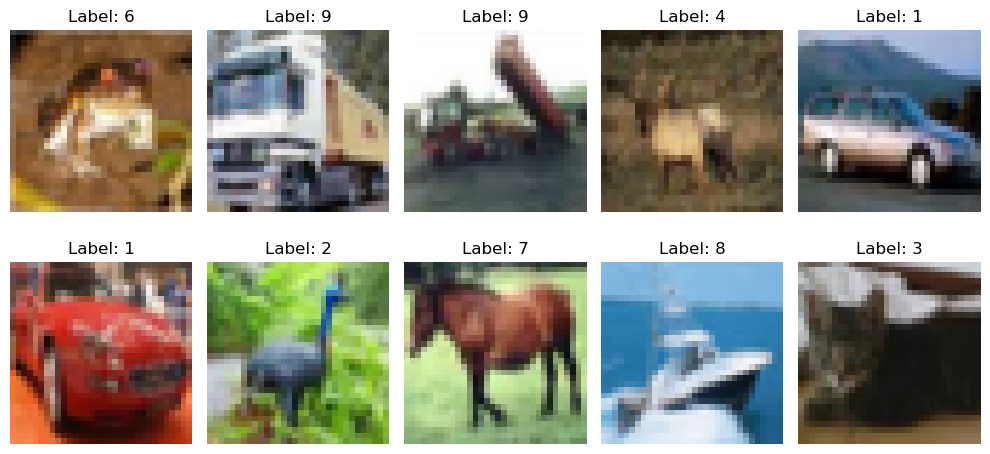

In [8]:
# insert code here
# Display some images from the training dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.set_title(f'Label: {y_train[i][0]}')  # Get label from y_train
    ax.axis('off')

plt.tight_layout()
plt.show()

## Prepare data

In [9]:

# insert code here
# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [10]:
# insert code here
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Input(shape=(32, 32, 3)))  # Define input shape here
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Add Dense layers on top

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [14]:
# insert code here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Fit the training data

In [22]:
from tensorflow.keras.callbacks import TensorBoard


In [23]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [17]:
%%time
# insert code here
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.3512 - loss: 1.7452 - val_accuracy: 0.5464 - val_loss: 1.2865
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5800 - loss: 1.1875 - val_accuracy: 0.6254 - val_loss: 1.0666
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6422 - loss: 1.0132 - val_accuracy: 0.6621 - val_loss: 0.9697
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6837 - loss: 0.9065 - val_accuracy: 0.6635 - val_loss: 0.9543
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7088 - loss: 0.8308 - val_accuracy: 0.6793 - val_loss: 0.9163
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7332 - loss: 0.7586 - val_accuracy: 0.7001 - val_loss: 0.8874
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7542 - loss: 0.7067 - val_accuracy: 0.6936 - val_loss: 0.9128
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7725 -

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit.
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

## Create predictions

In [24]:
# Ensure that your model has been compiled and trained
# model.compile(...)
# history = model.fit(...)

# Make predictions on the test dataset
predictions = model.predict(X_test)  # This generates probability outputs for each class

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Print some predicted classes
print(predicted_classes[:10])  # Prints the predicted class for the first 10 images


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[3 8 9 0 6 6 3 4 3 1]


## Evaluate the model

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7192 - loss: 0.8518
Test loss: 0.8604, Test accuracy: 0.7145


## Visualisation of cost

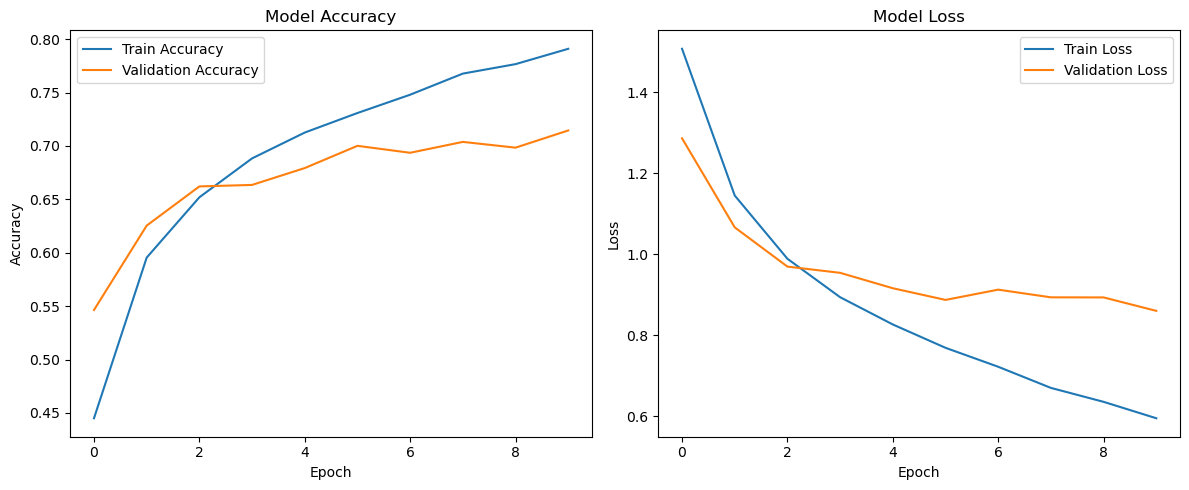

In [20]:
# insert code here
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## Results

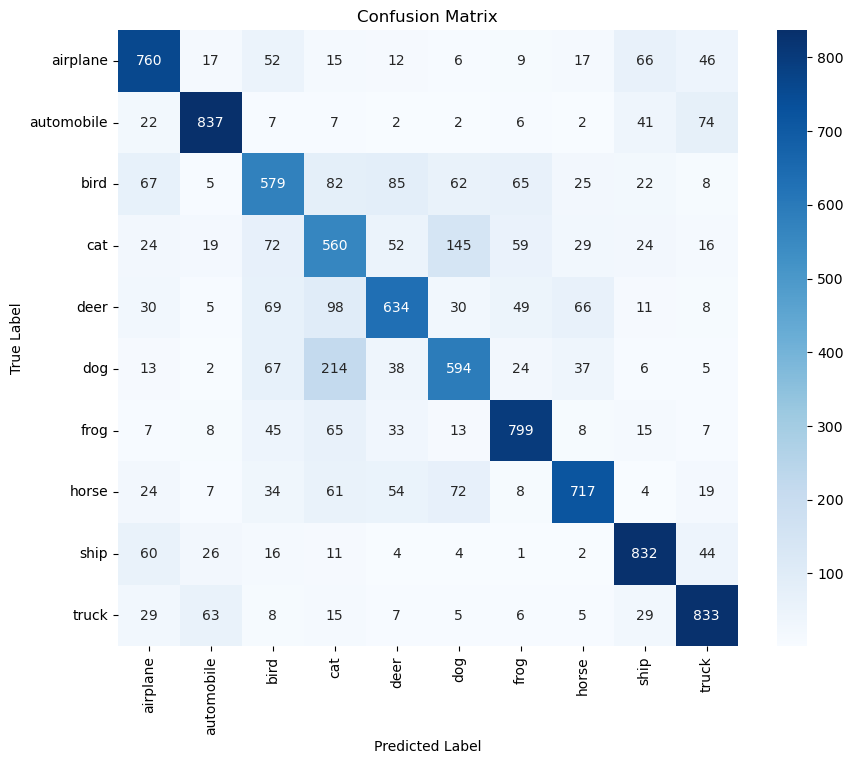

In [26]:
# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Flatten y_test to 1D
y_test_flat = y_test.ravel()

# Create the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_flat, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [27]:
from sklearn.metrics import classification_report

report = classification_report(y_test_flat, predicted_classes, target_names=[
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
])
print(report)

              precision    recall  f1-score   support

    Airplane       0.73      0.76      0.75      1000
  Automobile       0.85      0.84      0.84      1000
        Bird       0.61      0.58      0.59      1000
         Cat       0.50      0.56      0.53      1000
        Deer       0.69      0.63      0.66      1000
         Dog       0.64      0.59      0.61      1000
        Frog       0.78      0.80      0.79      1000
       Horse       0.79      0.72      0.75      1000
        Ship       0.79      0.83      0.81      1000
       Truck       0.79      0.83      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



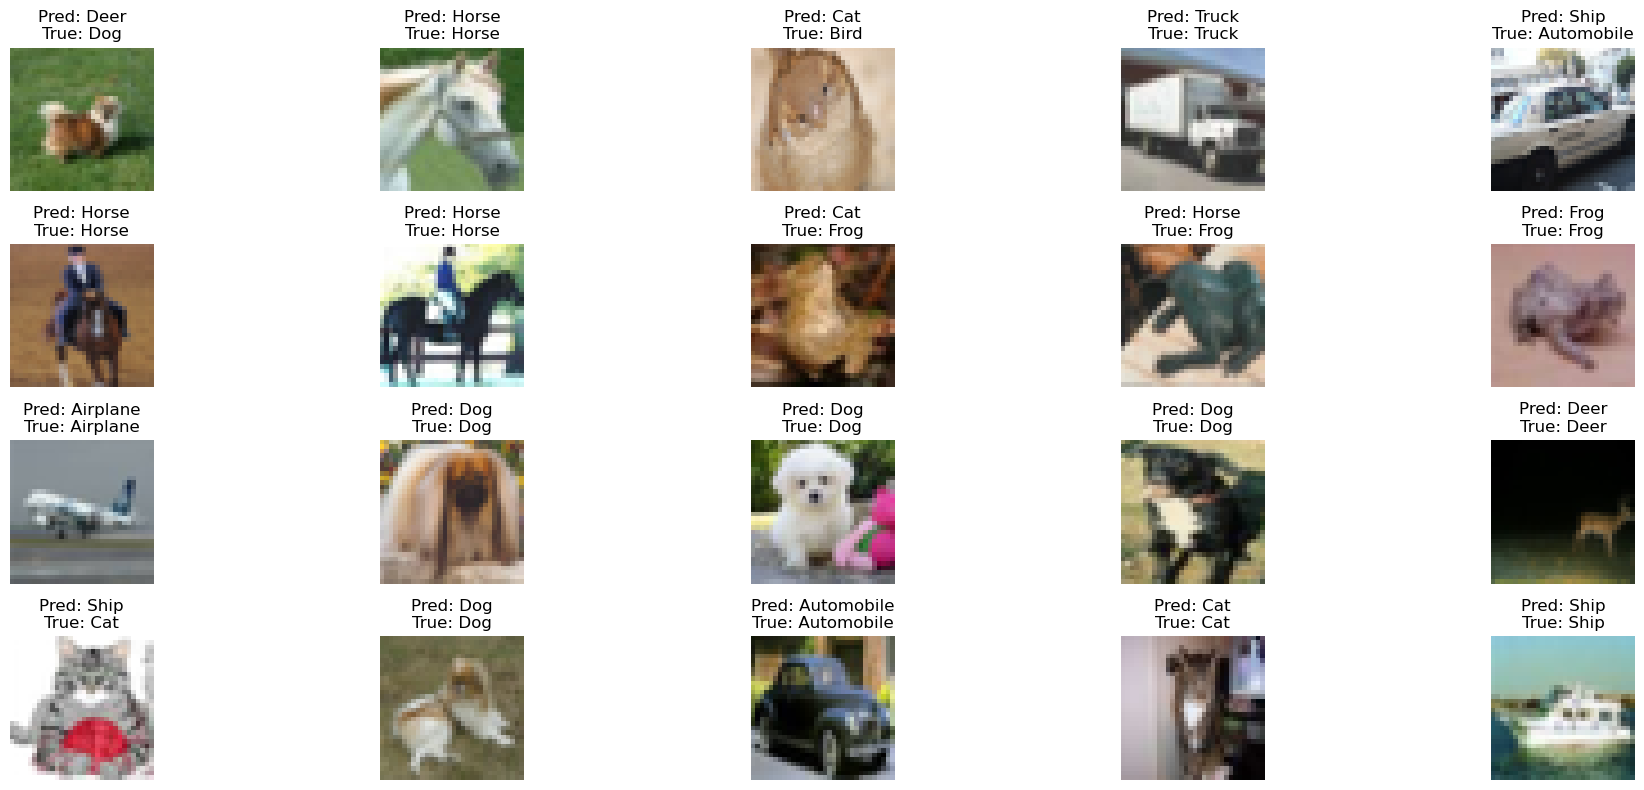

In [28]:
# CIFAR-10 class names
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Number of images to display
num_images = 20

# Randomly select indices from the test set
indices = np.random.choice(len(X_test), num_images, replace=False)

# Set up the plot
plt.figure(figsize=(20, 8))  # Adjust the figure size for 20 images

# Loop through the selected indices
for i, idx in enumerate(indices):
    plt.subplot(4, 5, i + 1)  # 4 rows and 5 columns
    plt.imshow(X_test[idx])  # Display the test image
    plt.title(f"Pred: {class_names[predicted_classes[idx]]}\nTrue: {class_names[y_test_flat[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



